# Financial Analysis
Here we run all the codes mentioned in readme.md from the material.
Besides, we add some sections to perform the financial analysis better.

## Setup

In [1]:
!pip install -r requirements.txt

In [2]:
# To better show the result, ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Data Extraction and Exploratory Data Analysis
### Getting data

In [3]:
import stock_analysis

In [4]:
from stock_analysis import StockReader

reader = StockReader('2017-01-01', '2018-12-31')

# get bitcoin data in USD
bitcoin = reader.get_bitcoin_data('USD')

# get faang data
fb, aapl, amzn, nflx, goog = (
    reader.get_ticker_data(ticker)
    for ticker in ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# get S&P 500 data
sp = reader.get_index_data('S&P 500')

### Grouping data

In [5]:
from stock_analysis.utils import group_stocks, describe_group

faang = group_stocks(
    {
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog
    }
)

faang_sp = group_stocks(
    {
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog,
        'S&P 500' : sp
    }
)

bit_sp = group_stocks(
    {
        'Bitcoin' : bitcoin,
        'S&P 500' : sp
    }
)

all_assets = group_stocks(
    {
        'Bitcoin' : bitcoin,
        'S&P 500' : sp,
        'Facebook' : fb, 
        'Apple' : aapl, 
        'Amazon' : amzn, 
        'Netflix' : nflx, 
        'Google' : goog
    }
)

In [6]:
# describe the group
describe_group(faang)

name                   Amazon         Apple      Facebook        Google  \
adj_close count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   6.524733e+01  4.036563e+01  1.640436e+02  5.087515e+01   
          std    1.862358e+01  6.552835e+00  2.014295e+01  6.003888e+00   
          min    3.768350e+01  2.710296e+01  1.168600e+02  3.930700e+01   
          25%    4.839963e+01  3.592701e+01  1.485000e+02  4.648500e+01   
          50%    5.973575e+01  4.013284e+01  1.675450e+02  5.144950e+01   
          75%    8.117637e+01  4.456289e+01  1.787625e+02  5.519538e+01   
          max    1.019755e+02  5.571731e+01  2.175000e+02  6.341650e+01   
close     count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   6.524733e+01  4.245056e+01  1.640436e+02  5.087515e+01   
          std    1.862358e+01  6.565316e+00  2.014295e+01  6.003888e+00   
          min    3.768350e+01  2.900500e+01  1.168600e+02  3.930700e+01   
          25%    4.839963e+01  3.805062e+01  1.485000e+02  4.648500e+01   
          50%    5.973575e+01  4.218500e+01  1.675450e+02  5.144950e+01   
          75%    8.117637e+01  4.650063e+01  1.787625e+02  5.519538e+01   
          max    1.019755e+02  5.801750e+01  2.175000e+02  6.341650e+01   
high      count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   6.593397e+01  4.280002e+01  1.655854e+02  5.131691e+01   
          std    1.897380e+01  6.678649e+00  2.017716e+01  6.130936e+00   
          min    3.793800e+01  2.908250e+01  1.178400e+02  3.948150e+01   
          25%    4.885188e+01  3.846125e+01  1.501950e+02  4.673862e+01   
          50%    6.027075e+01  4.262500e+01  1.690350e+02  5.206850e+01   
          75%    8.228450e+01  4.684375e+01  1.801275e+02  5.573687e+01   
          max    1.025250e+02  5.836750e+01  2.186200e+02  6.369450e+01   
low       count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   6.451436e+01  4.208389e+01  1.623251e+02  5.040833e+01   
          std    1.831416e+01  6.466501e+00  1.997137e+01  5.901058e+00   
          min    3.738500e+01  2.869000e+01  1.155100e+02  3.879000e+01   
          25%    4.810275e+01  3.749500e+01  1.472975e+02  4.618363e+01   
          50%    5.942050e+01  4.172750e+01  1.658150e+02  5.088125e+01   
          75%    8.000625e+01  4.622313e+01  1.771775e+02  5.477287e+01   
          max    1.006500e+02  5.744500e+01  2.142700e+02  6.245100e+01   
open      count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   6.530871e+01  4.244454e+01  1.639770e+02  5.086688e+01   
          std    1.870542e+01  6.580608e+00  2.008269e+01  6.022581e+00   
          min    3.789600e+01  2.895000e+01  1.160300e+02  3.894050e+01   
          25%    4.860200e+01  3.794625e+01  1.486400e+02  4.649887e+01   
          50%    5.993650e+01  4.226125e+01  1.675100e+02  5.140225e+01   
          75%    8.109188e+01  4.656187e+01  1.786750e+02  5.522525e+01   
          max    1.019055e+02  5.769500e+01  2.157200e+02  6.355000e+01   
volume    count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
          mean   9.165749e+07  1.223093e+08  2.222427e+07  3.218480e+07   
          std    4.837389e+07  5.399572e+07  1.553659e+07  1.381790e+07   
          min    3.170200e+07  5.005560e+07  8.190300e+06  1.074000e+07   
          25%    5.815650e+07  8.519860e+07  1.385520e+07  2.368700e+07   
          50%    7.547800e+07  1.068838e+08  1.805165e+07  2.803400e+07   
          75%    1.119885e+08  1.425951e+08  2.434852e+07  3.691300e+07   
          max    3.313000e+08  4.479400e+08  1.698037e+08  1.033540e+08   

name                  Netflix  
adj_close count  5.020000e+02  
          mean   2.423323e+02  
          std    8.576021e+01  
          min    1.274900e+02  
          25%    1.625700e+02  
          50%    2.018750e+02  
          75%    3.212650e+02  
          max    4.189700e+02  
close     count  5.020000e+02  
    

In [7]:
# describe all the assets at once
describe_group(all_assets).loc['close',]

name,Amazon,Apple,Bitcoin,Facebook,Google,Netflix,S&P 500
count,502.000000,502.000000,730.000000,502.000000,502.000000,502.000000,502.000000
mean,65.247330,42.450563,5789.166288,164.043566,50.875149,242.332291,2597.645281
std,18.623580,6.565316,3794.382014,20.142954,6.003888,85.760210,181.994087
min,37.683498,29.004999,777.757019,116.860001,39.306999,127.489998,2257.830078
25%,48.399627,38.050624,2589.457458,148.500000,46.485001,162.569996,2434.777527
50%,59.735750,42.185001,6252.710205,167.544998,51.449501,201.875000,2629.420044
75%,81.176374,46.500626,7672.175171,178.762505,55.195376,321.264992,2742.534912
max,101.975502,58.017502,19497.400391,217.500000,63.416500,418.970001,2930.750000


In [8]:
# describe the group bit_sp and transpose it
describe_group(bit_sp).loc['close',].T

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Bitcoin,730.0,5789.166288,3794.382014,777.757019,2589.457458,6252.710205,7672.175171,19497.400391
S&P 500,502.0,2597.645281,181.994087,2257.830078,2434.777527,2629.420044,2742.534912,2930.750000


In [9]:
# Compare the FAANG stocks to each other
describe_group(faang).loc[['close', 'volume'],]

name                Amazon         Apple      Facebook        Google  \
close  count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
       mean   6.524733e+01  4.245056e+01  1.640436e+02  5.087515e+01   
       std    1.862358e+01  6.565316e+00  2.014295e+01  6.003888e+00   
       min    3.768350e+01  2.900500e+01  1.168600e+02  3.930700e+01   
       25%    4.839963e+01  3.805062e+01  1.485000e+02  4.648500e+01   
       50%    5.973575e+01  4.218500e+01  1.675450e+02  5.144950e+01   
       75%    8.117637e+01  4.650063e+01  1.787625e+02  5.519538e+01   
       max    1.019755e+02  5.801750e+01  2.175000e+02  6.341650e+01   
volume count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
       mean   9.165749e+07  1.223093e+08  2.222427e+07  3.218480e+07   
       std    4.837389e+07  5.399572e+07  1.553659e+07  1.381790e+07   
       min    3.170200e+07  5.005560e+07  8.190300e+06  1.074000e+07   
       25%    5.815650e+07  8.519860e+07  1.385520e+07  2.368700e+07   
       50%    7.547800e+07  1.068838e+08  1.805165e+07  2.803400e+07   
       75%    1.119885e+08  1.425951e+08  2.434852e+07  3.691300e+07   
       max    3.313000e+08  4.479400e+08  1.698037e+08  1.033540e+08   

name               Netflix  
close  count  5.020000e+02  
       mean   2.423323e+02  
       std    8.576021e+01  
       min    1.274900e+02  
       25%    1.625700e+02  
       50%    2.018750e+02  
       75%    3.212650e+02  
       max    4.189700e+02  
volume count  5.020000e+02  
       mean   9.029815e+06  
       std    5.520675e+06  
       min    2.160500e+06  
       25%    5.299525e+06  
       50%    7.451150e+06  
       75%    1.121950e+07  
       max    5.841040e+07

### Building a portfolio
Groups assets by date and sums columns to build a portfolio.

In [10]:
from stock_analysis.utils import make_portfolio

faang_portfolio = make_portfolio(faang)

## Data Visualization

In [11]:
import matplotlib.pyplot as plt
from stock_analysis import StockVisualizer

### Single asset (Netflix)

In [12]:
# Define name 'netflix_viz'
netflix_viz = StockVisualizer(nflx)

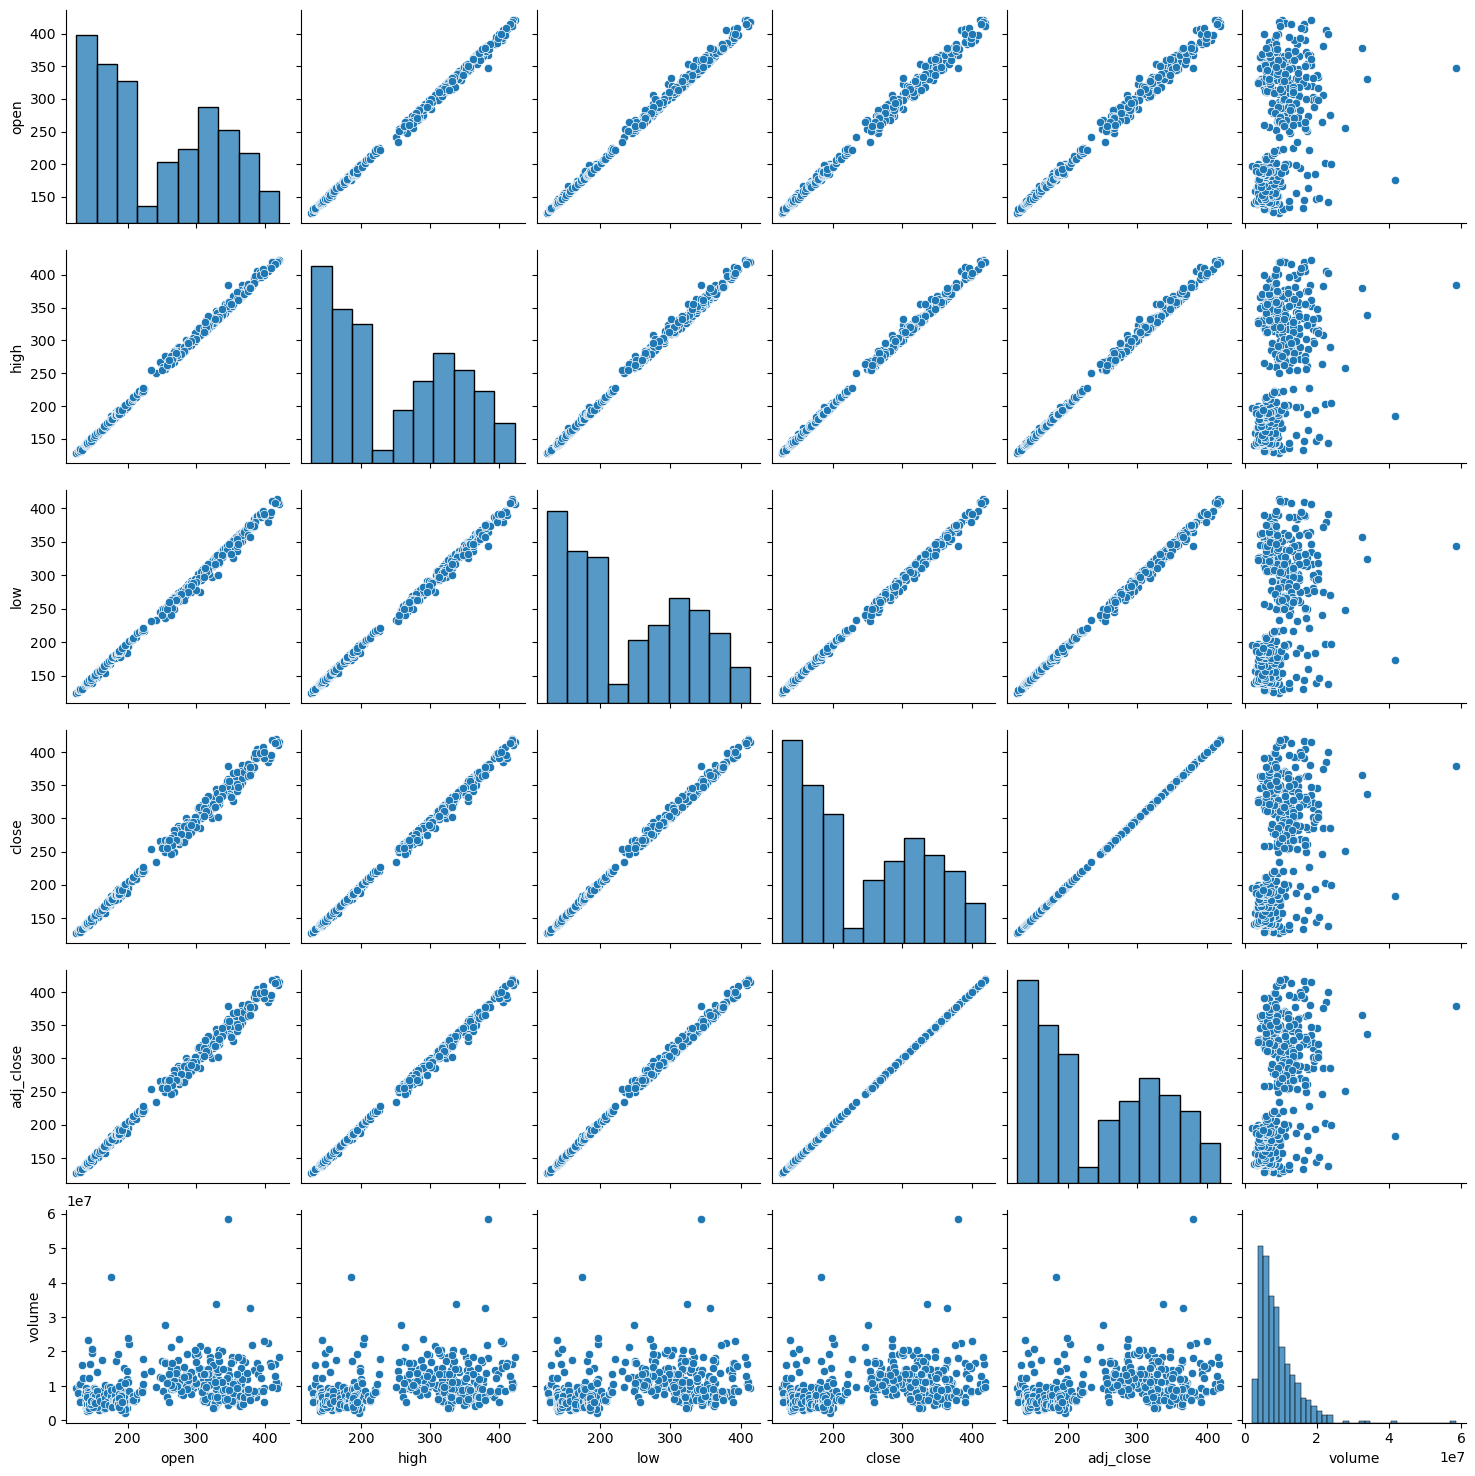

In [13]:
# Use the pairplot() method to see the seaborn.pairplot() of the OHLC data
netflix_viz.pairplot()
plt.show()

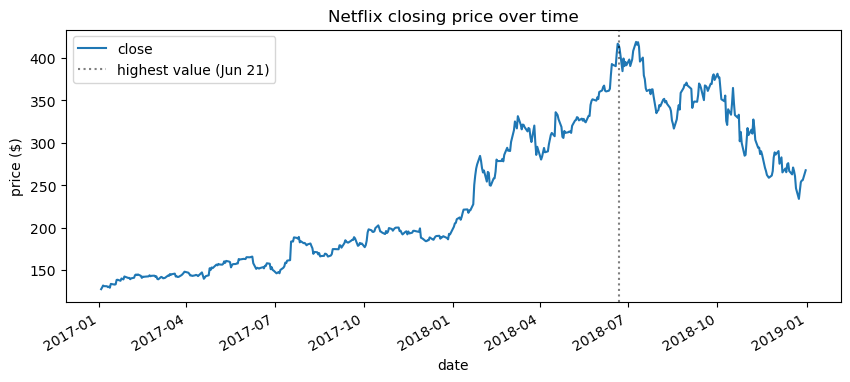

In [14]:
# Evolution over time to see how the price changed
ax = netflix_viz.evolution_over_time(
    'close',
    figsize=(10, 4),
    legend=False,
    title='Netflix closing price over time'
)
netflix_viz.add_reference_line(
    ax,
    x=nflx.high.idxmax(),
    color='k',
    linestyle=':',
    label=f'highest value ({nflx.high.idxmax():%b %d})',
    alpha=0.5
)
ax.set_ylabel('price ($)')
plt.show()

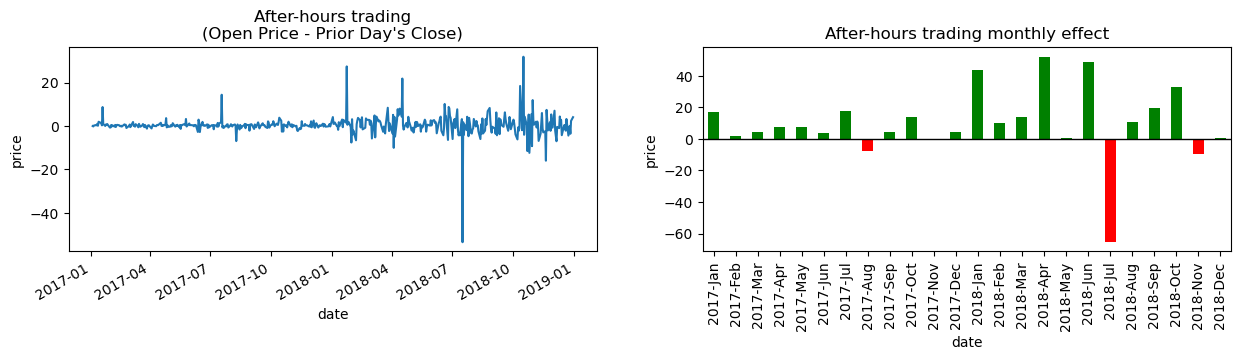

In [15]:
# After hours trades
netflix_viz.after_hours_trades()
plt.show()

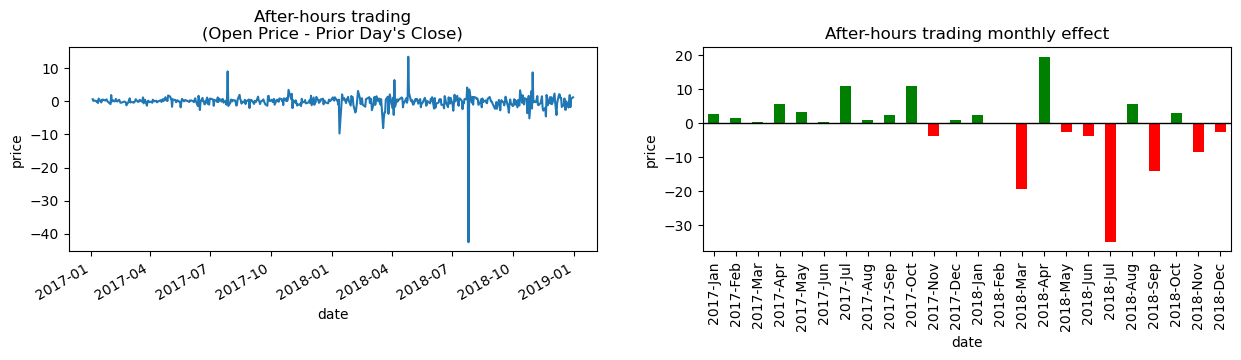

In [16]:
# After hours trades compare to FB
stock_analysis.StockVisualizer(fb).after_hours_trades()
# We could also run: 
# fb_viz = StockVisualizer(fb)
# fb_viz.after_hours_trades()
plt.show()

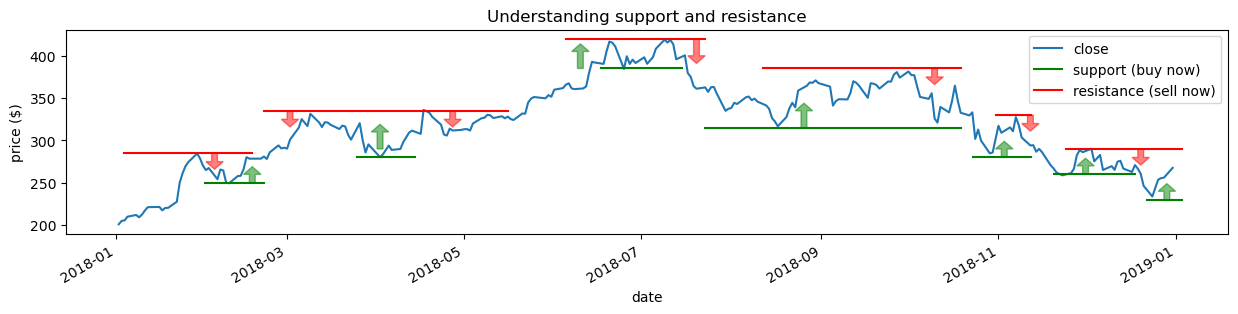

In [17]:
# Visualize support and resistance levels using moving averages
ax = stock_analysis.StockVisualizer(nflx['2018']).evolution_over_time(
    'close', figsize=(15, 3), legend=False, title='Understanding support and resistance'
)

ref_lines = [
    (315, 0.55, 0.77, 'g', 'support (buy now)'),
    (250, 0.12, 0.17, 'g', ''),
    (280, 0.25, 0.3, 'g', ''),
    (280, 0.78, 0.83, 'g', ''),
    (260, 0.85, 0.92, 'g', ''),
    (230, 0.93, 0.96, 'g', ''),
    (385, 0.46, 0.53, 'g', ''),
    (420, 0.43, 0.55, 'r', 'resistance (sell now)'),
    (285, 0.05, 0.16, 'r', ''),
    (335, 0.17, 0.38, 'r', ''),
    (385, 0.6, 0.77, 'r', ''),
    (330, 0.8, 0.83, 'r', ''),
    (290, 0.86, 0.96, 'r', '')
]

for y, xmin, xmax, color, label in ref_lines:
    ax.axhline(y, xmin, xmax, color=color, label=label)

arrows = [
    ('2018-08-26', 315, 0, 20, 'g'),
    ('2018-02-17', 250, 0, 10, 'g'),
    ('2018-04-02', 290, 0, 20, 'g'),
    ('2018-11-03', 280, 0, 10, 'g'),
    ('2018-12-01', 260, 0, 10, 'g'),
    ('2018-12-29', 230, 0, 10, 'g'),
    ('2018-06-10', 385, 0, 20, 'g'),
    ('2018-07-20', 420, 0, -20, 'r'),
    ('2018-02-04', 285, 0, -10, 'r'),
    ('2018-03-02', 335, 0, -10, 'r'),
    ('2018-04-27', 335, 0, -10, 'r'),
    ('2018-10-10', 385, 0, -10, 'r'),
    ('2018-11-12', 330, 0, -10, 'r'),
    ('2018-12-20', 290, 0, -10, 'r')
]

for date, y, growx, growy, color in arrows:
    ax.arrow(date, y, growx, growy, width=2, alpha=0.5, color=color)

plt.ylabel('price ($)')
plt.legend()

Text(0, 0.5, 'price ($)')

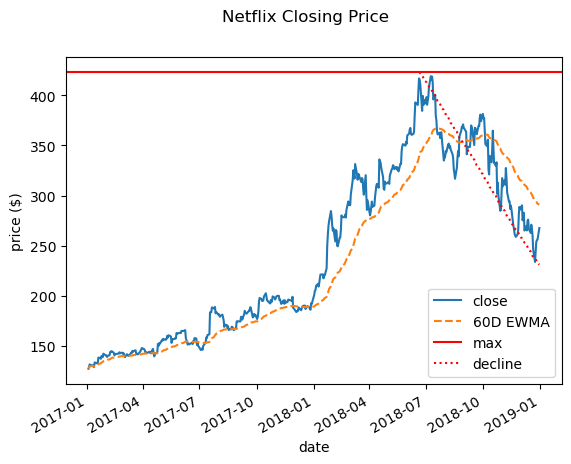

In [18]:
# Exponential smoothing to Netflix's closing price
import numpy as np
ax = netflix_viz.exp_smoothing('close', 60)
netflix_viz.add_reference_line(
    ax, y=nflx.high.max(), color='red', linestyle='-', label='max'
)
nflx_decline = nflx[nflx.high.idxmax():]
netflix_viz.add_reference_line(
    ax, 
    x=nflx_decline.index, 
    y=np.linspace(
        nflx_decline.high.max(), 
        nflx_decline.low.min(), 
        num=nflx_decline.shape[0]
    ), 
    color='r', 
    linestyle=':', 
    label='decline'
)
plt.suptitle('Netflix Closing Price')
plt.ylabel('price ($)')

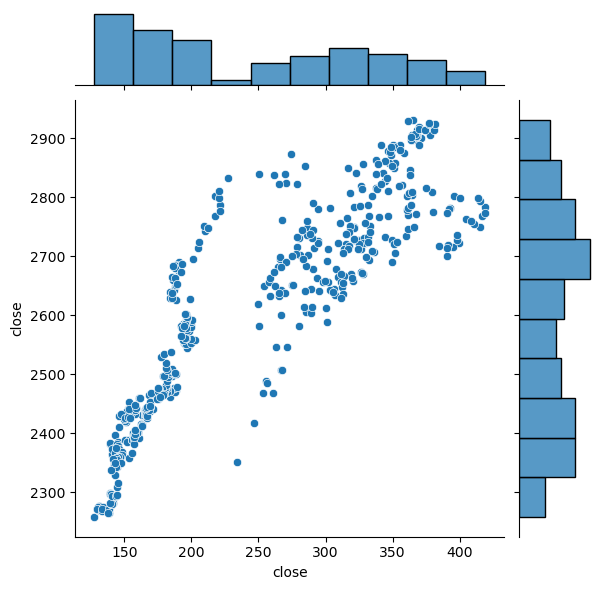

In [19]:
# Use a joint plot to see how Netflix compared to the S&P 500
netflix_viz.jointplot(sp, 'close')
plt.show()

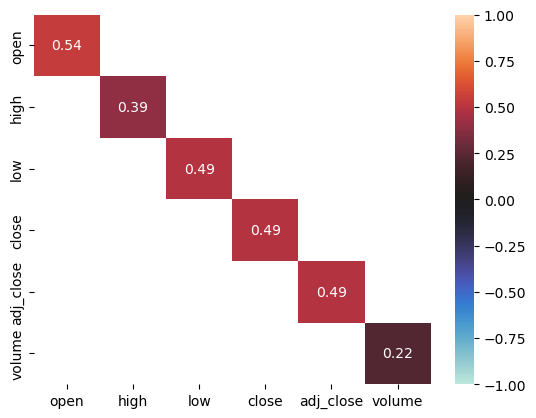

In [20]:
# Differential in correlation heatmap versus fb
netflix_viz.correlation_heatmap(fb)
plt.show()

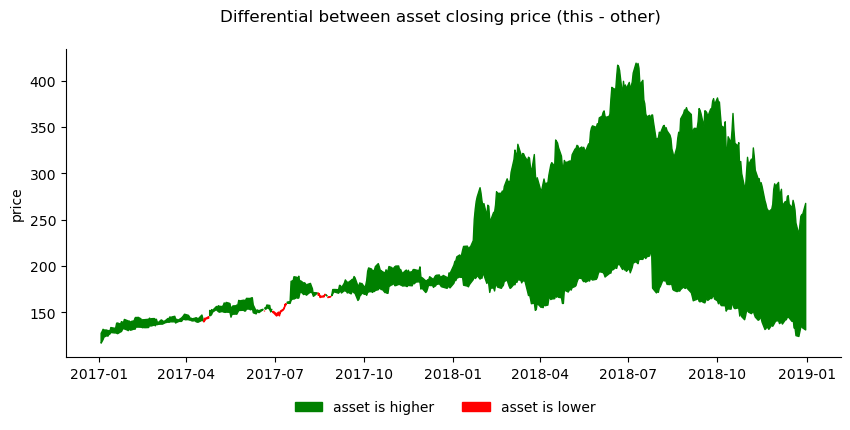

In [21]:
# Differential in closing price versus fb
netflix_viz.fill_between_other(fb)
plt.show()

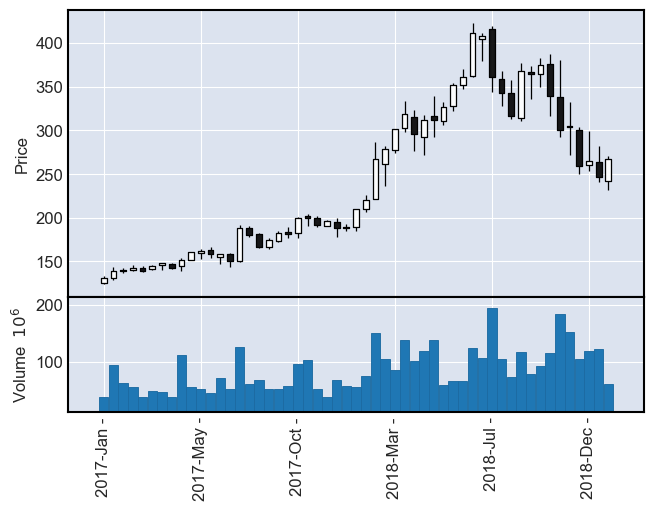

In [22]:
# Candlestick plots with resampling (uses mplfinance)
netflix_viz.candlestick(resample='2W', volume=True, xrotation=90, datetime_format='%Y-%b -')

### Asset groups

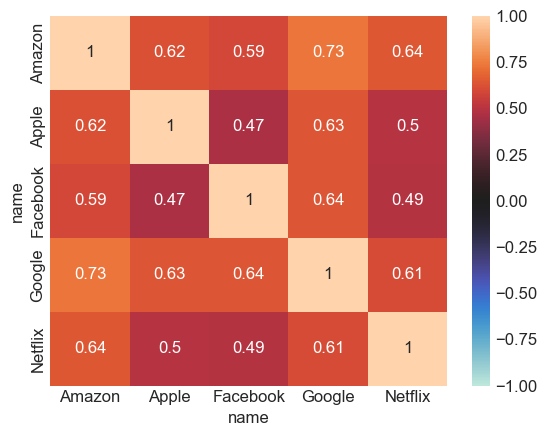

In [23]:
# Correlation heatmap
from stock_analysis import AssetGroupVisualizer

faang_viz = AssetGroupVisualizer(faang)
faang_viz.heatmap(True)
plt.show()

## Financial Metrics by analyzing data
### Single asset (Netflix)

In [24]:
from stock_analysis import StockAnalyzer

nflx_analyzer = StockAnalyzer(nflx)
nflx_analyzer.annualized_volatility()

0.4633808742783183

### Asset Group

In [25]:
from stock_analysis import AssetGroupAnalyzer

faang_analyzer = AssetGroupAnalyzer(faang)
faang_analyzer.analyze('annualized_volatility')

faang_analyzer.analyze('beta', index=sp)

{'Amazon': 1.5811320419760921,
 'Apple': 1.275199180029694,
 'Facebook': 1.27738902045439,
 'Google': 1.3547552695448335,
 'Netflix': 1.8329279590822753}

In [26]:
# Group all the assets
all_assets_analyzer = stock_analysis.AssetGroupAnalyzer(
    all_assets
)

#### Coefficient of Variation
We can check how large the standard deviation is in terms of the mean of the stock price as another way to look at volatility. This shows that bitcoin is the most volatile:

In [27]:
all_assets_analyzer.analyze('cv')

{'Amazon': 0.2854305336883699,
 'Apple': 0.15465793302855302,
 'Bitcoin': 0.655428057358647,
 'Facebook': 0.12279027356045312,
 'Google': 0.11801219954593486,
 'Netflix': 0.3538950971123318,
 'S&P 500': 0.07006117737058823}

#### Annualized Volatility
Facebook looks more volatile using this metric than the previous, but it's just middle of the pack.

In [28]:
all_assets_analyzer.analyze('annualized_volatility')

{'Amazon': 0.36064939717790395,
 'Apple': 0.2870941266617102,
 'Bitcoin': 0.5395396432364564,
 'Facebook': 0.37984188430375,
 'Google': 0.28079684858854204,
 'Netflix': 0.4633808742783183,
 'S&P 500': 0.17024852961093584}

#### Bear Market
We can check if the assets are in a bear market, meaning their value dropped 20% in the last 2 months:

In [29]:
all_assets_analyzer.analyze('is_bear_market')

{'Amazon': False,
 'Apple': True,
 'Bitcoin': True,
 'Facebook': False,
 'Google': False,
 'Netflix': False,
 'S&P 500': False}

#### Beta
Beta tells us how the assets performance correlates to a market index. A beta of 1 with the S&P 500 means the asset moves with the S&P 500. Notice bitcoin is below zero because it is a different type of asset.

In [30]:
all_assets_analyzer.analyze('beta', index=sp)

{'Amazon': 1.5811320419760921,
 'Apple': 1.275199180029694,
 'Bitcoin': 0.5036197087082158,
 'Facebook': 1.27738902045439,
 'Google': 1.3547552695448335,
 'Netflix': 1.8329279590822753,
 'S&P 500': 1.0000000000000004}

#### Alpha
Alpha allows us to compare the returns of an asset to an index. We can compare to the S&P 500 using a risk-free rate of return of 2.46% (current government treasury bond rate). This shows that Facebook has worse returns and bitcoin much higher than the S&P 500 (due to scale): 

In [31]:
all_assets_analyzer.analyze('alpha', index=sp, r_f=2.46)

{'Amazon': 0.8327850698347556,
 'Apple': 0.22419744564285837,
 'Bitcoin': 2.681223883357652,
 'Facebook': -0.012292092689440204,
 'Google': 0.17664397994594827,
 'Netflix': 0.9177920494665195,
 'S&P 500': -4.163336342344337e-17}

#### Cumulative Returns
Cumulative returns show us what we would have made for a dollar investment at time period 0. This can be multipled by the actual investment to get the return:

Text(0.5, 0.98, 'Cumulative Returns 2017-2018')

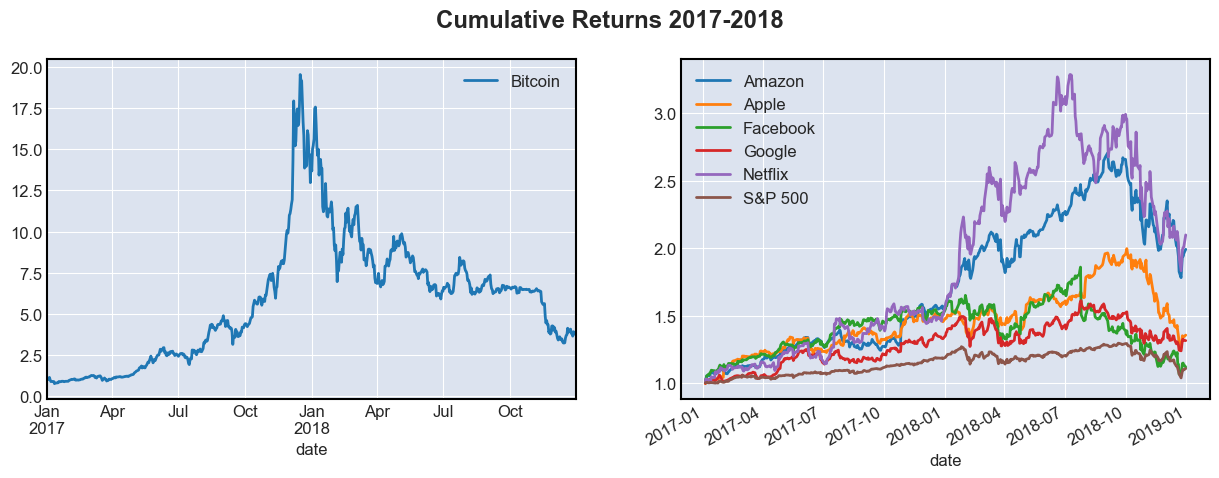

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
cumulative_returns = all_assets_analyzer.analyze(
    'cumulative_returns'
)
for name, data in cumulative_returns.items():
    data.plot(
        ax=axes[0] if name == 'Bitcoin' else axes[1], 
        label=name,
        legend=True
    )
plt.suptitle('Cumulative Returns 2017-2018')

## Financial Model

In [33]:
# Use the `StockModeler` to build the model
from stock_analysis import StockModeler

### Time Series Decomposition
We can decompose the Netflix time series into its trend, seasonality component, and residuals:

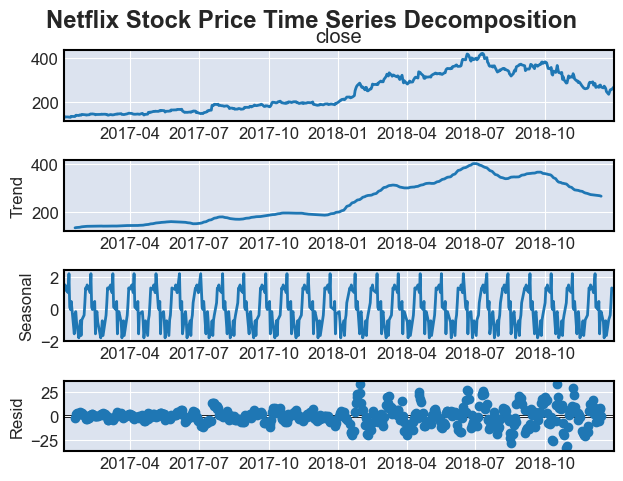

In [34]:
decomposition = StockModeler.decompose(nflx, 20) # 20 period frequency
fig = decomposition.plot()
fig.suptitle('Netflix Stock Price Time Series Decomposition', y=1)
plt.show()

### ARIMA
We can use ARIMA to model the performance with autoregressive (AR), differences or lagged data (I), and moving average (MA) terms. The autocorrelation plot can help find a good starting point for this:

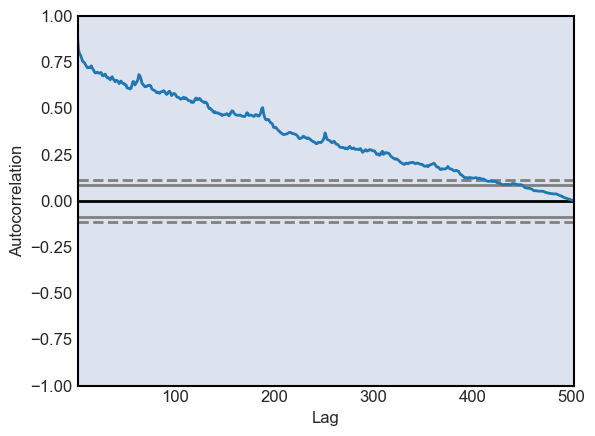

In [35]:
# we can use autocorrelation plots to find a good starting point for ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(nflx)
plt.show()

In [36]:
# The 'summary()' method shows statistics
# AR = 10, I = 1, MA = 5
arima_model = StockModeler.arima(nflx, ar=10, i=1, ma=5)
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  520
Model:                ARIMA(10, 1, 5)   Log Likelihood               -1705.466
Date:                Thu, 23 Mar 2023   AIC                           3442.932
Time:                        18:31:59   BIC                           3510.963
Sample:                    01-03-2017   HQIC                          3469.585
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3806      0.228      1.671      0.095      -0.066       0.827
ar.L2          1.0470      0.105     10.004      0.000       0.842       1.252
ar.L3         -0.5654      0.252     -2.240      0.0

/Users/yichen/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


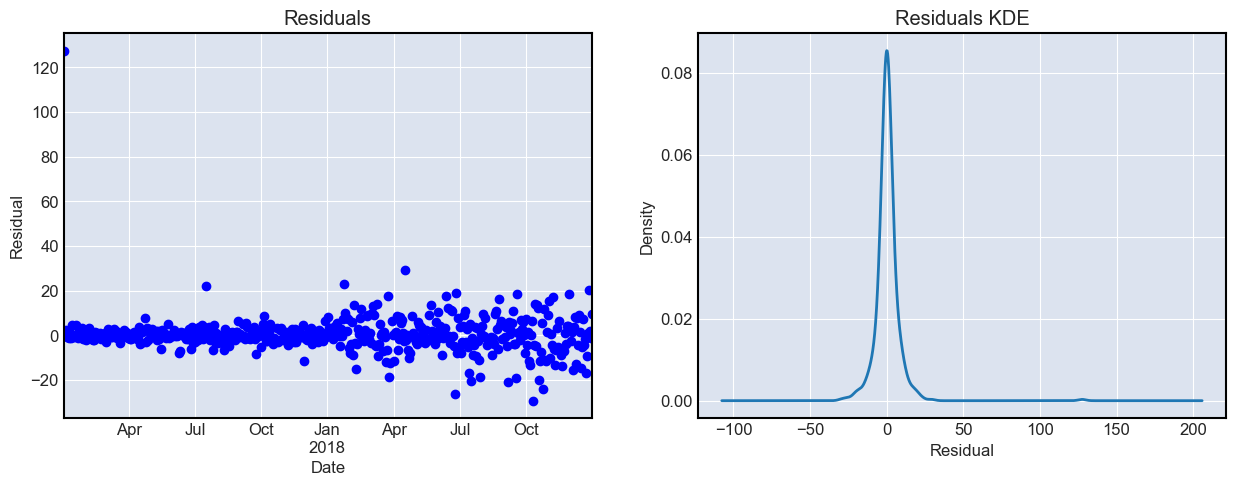

In [37]:
# Check the residuals
StockModeler.plot_residuals(arima_model)
plt.show()

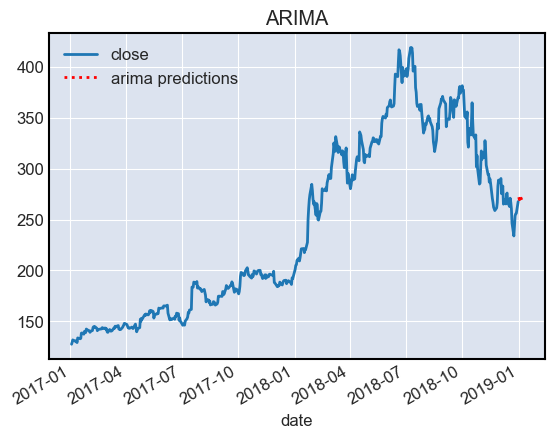

In [38]:
# Plot the predicions for one week from 2019-01-01
arima_ax = StockModeler.arima_predictions(
    nflx, arima_model,
    start='2019-01-01', end='2019-01-07',
    title='ARIMA'
)
plt.show()

### Linear regression
Build a linear regression using the last value to determine the next value:

In [39]:
X, Y, lm = StockModeler.regression(nflx)
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  close   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.156e+05
Date:                Thu, 23 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:31:59   Log-Likelihood:                         -1671.0
No. Observations:                 501   AIC:                                      3344.
Df Residuals:                     500   BIC:                                      3348.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

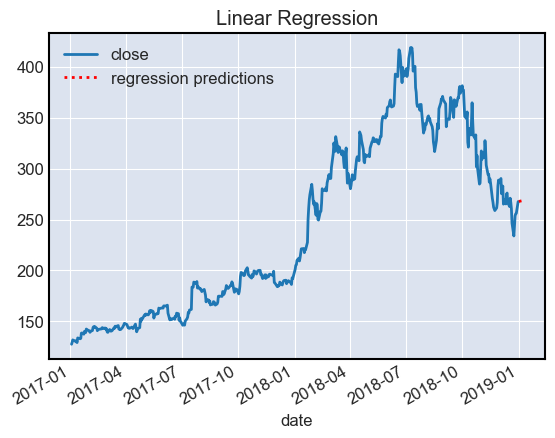

In [40]:
# Plot the predicions for one week from 2019-01-01
linear_reg = StockModeler.regression_predictions(
    nflx, lm,
    start='2019-01-01', end='2019-01-07',
    title='Linear Regression'
)
plt.show()

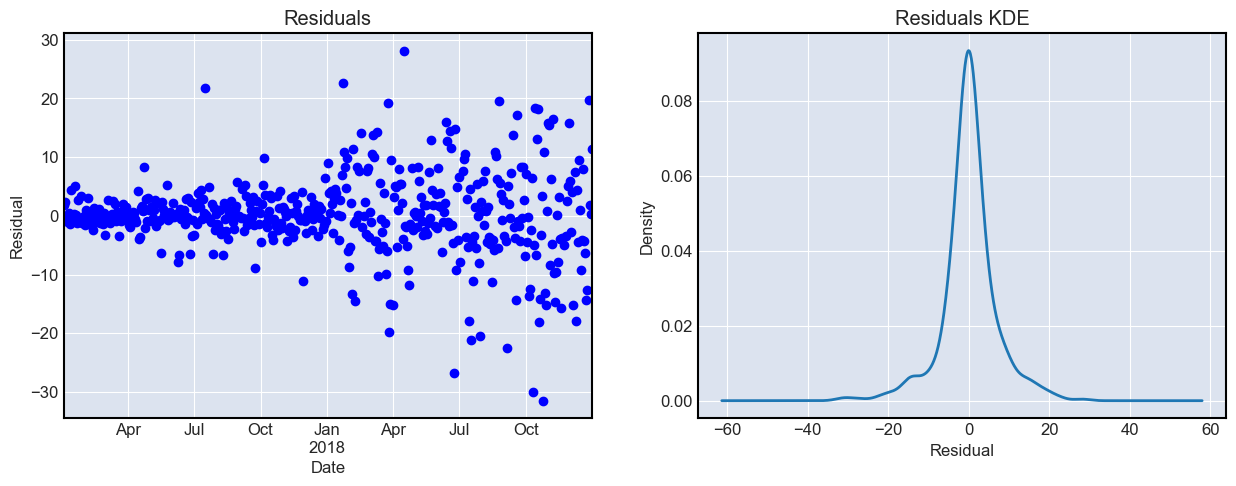

In [41]:
# Check the residuals
StockModeler.plot_residuals(lm)
plt.show()

### Compare Models Against Actuals
We can look at the predictions made. ARIMA looks like this:

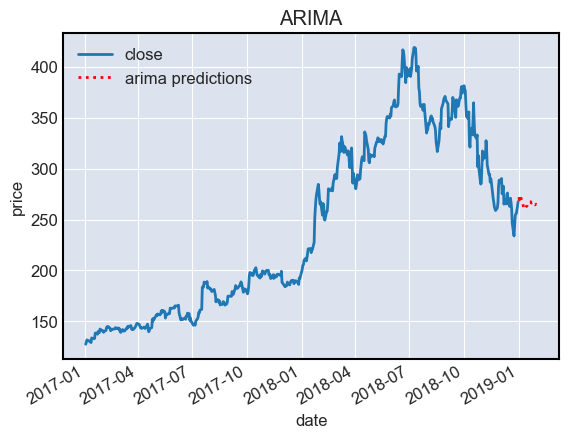

In [42]:
import datetime

start = datetime.date(2019, 1, 1)
end = datetime.date(2019, 1, 31)

StockModeler.arima_predictions(
    nflx, arima_model, start=start, end=end, title='ARIMA'
)
plt.ylabel('price')
plt.show()

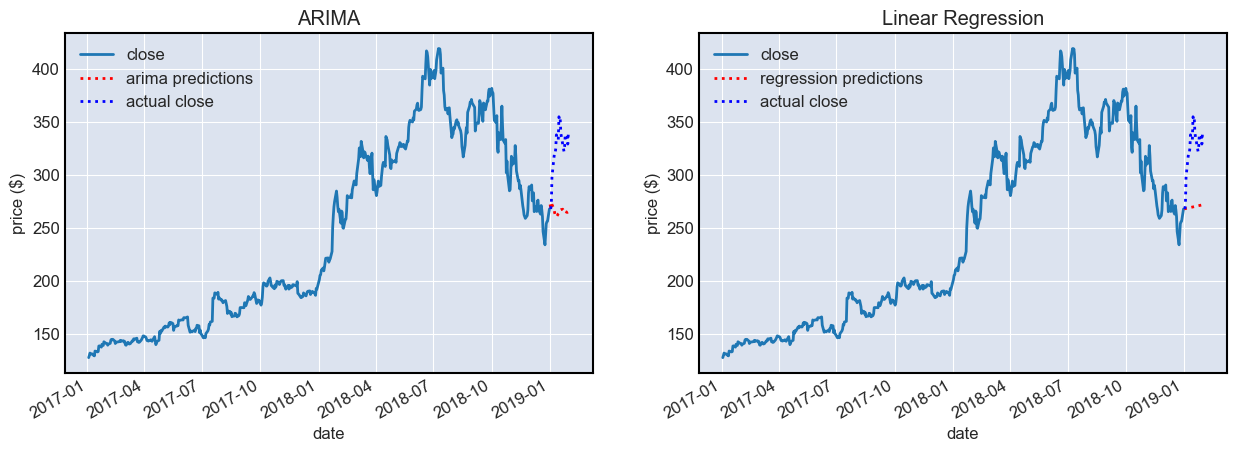

In [43]:
# Compare the predictions by ARIMA and Linear Regression model for one month from 2019-01-01
jan_2019 = stock_analysis.StockReader(
    start, end
).get_ticker_data('NFLX')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

arima_ax = StockModeler.arima_predictions(
    nflx, arima_model, start=start, end=end,
    ax=axes[0], title='ARIMA'
)
jan_2019.close.plot(ax=arima_ax, style='b:', label='actual close')
arima_ax.legend()
arima_ax.set_ylabel('price ($)')

linear_reg = StockModeler.regression_predictions(
    nflx, lm, start=start, end=end,
    ax=axes[1], title='Linear Regression'
)
jan_2019.close.plot(ax=linear_reg, style='b:', label='actual close')
linear_reg.legend()
linear_reg.set_ylabel('price ($)')
plt.show()

### Random Walks
Prediction is difficult due to randomness. Stock price can be modeled like a random walk.

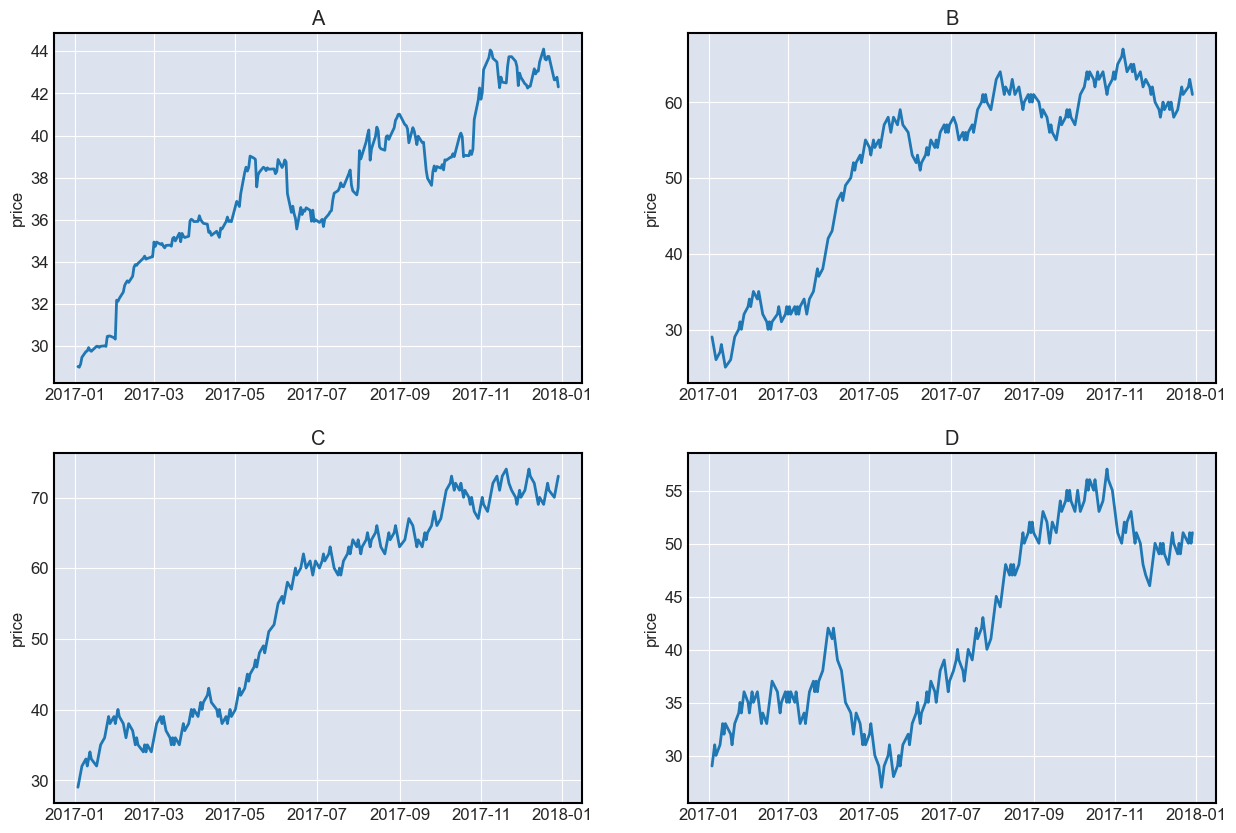

In [44]:
# Import random_walk.py in the ch_07 folder
from ch_07.random_walk import random_walk_stock_comparison

real_stock, axes = random_walk_stock_comparison(aapl['2017'], probs=[0.45, 0.55])
axes
plt.show()

In [45]:
# Answer to find the real stock data
real_stock

'real stock is at location A'